# Binary Predictive Modeling for Survivability of the Titanic

Vincent Luong

## Introduction
The sinking of the Titanic is one of the most infamous shipwrecks in history.  The 'unsinkable' ship sank after a collision with an iceberg resulting in many deaths; however, it was determined some groups were more likely to survive than others.  With the dataset provided from Kaggle, we hope to discover a predictive model which can determine whether a passenger were to survive the sinking.


## Data
The dataset is composed of 12 explanatory variables with n = 891. <br>
<b>Explanatory Variables: 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'<b>

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier


from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV

## Reading Data

In [2]:
train_dat = pd.read_csv('data/train.csv')
test_dat = pd.read_csv('data/test.csv')

##Column
train_dat.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
#Summary Statistics of Variables
train_dat.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train_dat.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [5]:
train_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Taking a look at datatypes
train_dat.dtypes[train_dat.dtypes != 'object']

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [7]:
# Info for variables
train_dat.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Finding Survivability Grouped by Certain Variables

In [8]:
train_dat.groupby(['Pclass'], as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
train_dat.groupby(['Sex'], as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In this dataset, a higher percentage of females were more likely to survive

In [10]:
train_dat.groupby(['Embarked'], as_index=False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [11]:
train_dat.groupby(['SibSp'], as_index=False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train_dat.groupby(['Parch'], as_index=False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [13]:
train_dat['Family_Size'] = train_dat['SibSp'] + train_dat['Parch'] + 1
test_dat['Family_Size'] = test_dat['SibSp'] + test_dat['Parch'] + 1

In [14]:
train_dat.groupby(['Family_Size'], as_index=False)['Survived'].mean()

,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


We notice that family sized 1-4 were more likely to survive, we can mutate this data into group size

In [15]:
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
train_dat['Family_Size_Grouped'] = train_dat['Family_Size'].map(family_map)
test_dat['Family_Size_Grouped'] = test_dat['Family_Size'].map(family_map)

In [16]:
train_dat.groupby(['Family_Size_Grouped'], as_index=False)['Survived'].mean()

,Family_Size_Grouped,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.162162
3,Small,0.578767


## Data Wrangling and Histogram Creations

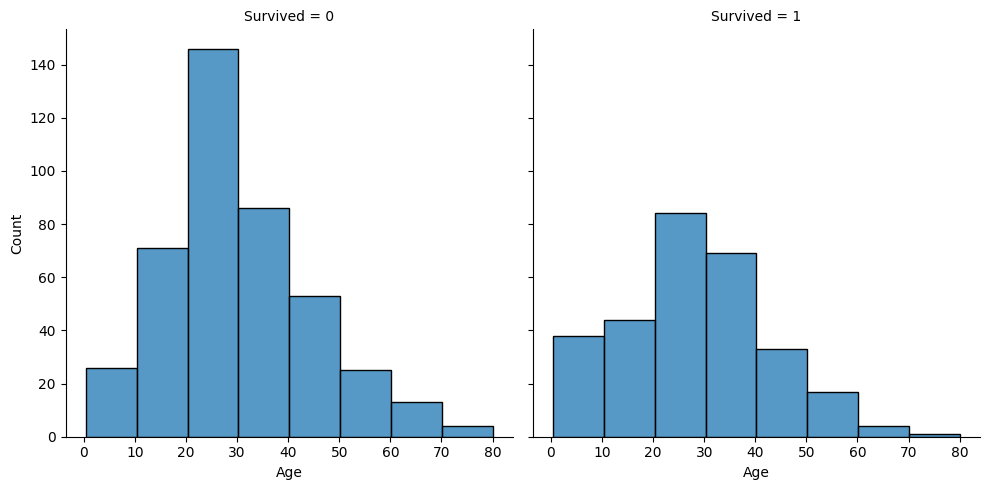

In [17]:
sns.displot(train_dat, x = 'Age', col = 'Survived', binwidth = 10, height=5)

In [18]:
train_dat['Age_Cut'] = pd.qcut(train_dat['Age'], 8)
test_dat['Age_Cut'] = pd.qcut(test_dat['Age'], 8)

In [19]:
train_dat.groupby(['Age_Cut'], as_index=False)['Survived'].mean()

,Age_Cut,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


In [20]:
train_dat.loc[train_dat['Age'] <= 16, 'Age'] = 0
train_dat.loc[(train_dat['Age'] > 16) & (train_dat['Age'] <= 20.125), 'Age'] = 1
train_dat.loc[(train_dat['Age'] > 20.125) & (train_dat['Age'] <= 24), 'Age'] = 2
train_dat.loc[(train_dat['Age'] > 24) & (train_dat['Age'] <= 28), 'Age'] = 3
train_dat.loc[(train_dat['Age'] > 28) & (train_dat['Age'] <= 32.312), 'Age'] = 4
train_dat.loc[(train_dat['Age'] > 32.312) & (train_dat['Age'] <= 38), 'Age'] = 5
train_dat.loc[(train_dat['Age'] > 38) & (train_dat['Age'] <= 47), 'Age'] = 6
train_dat.loc[(train_dat['Age'] > 47) & (train_dat['Age'] <= 80), 'Age'] = 7
train_dat.loc[train_dat['Age'] > 80, 'Age'] 


test_dat.loc[test_dat['Age'] <= 16, 'Age'] = 0
test_dat.loc[(test_dat['Age'] > 16) & (test_dat['Age'] <= 20.125), 'Age'] = 1
test_dat.loc[(test_dat['Age'] > 20.125) & (test_dat['Age'] <= 24), 'Age'] = 2
test_dat.loc[(test_dat['Age'] > 24) & (test_dat['Age'] <= 28), 'Age'] = 3
test_dat.loc[(test_dat['Age'] > 28) & (test_dat['Age'] <= 32.312), 'Age'] = 4
test_dat.loc[(test_dat['Age'] > 32.312) & (test_dat['Age'] <= 38), 'Age'] = 5
test_dat.loc[(test_dat['Age'] > 38) & (test_dat['Age'] <= 47), 'Age'] = 6
test_dat.loc[(test_dat['Age'] > 47) & (test_dat['Age'] <= 80), 'Age'] = 7
test_dat.loc[test_dat['Age'] > 80, 'Age'] 

Series([], Name: Age, dtype: float64)

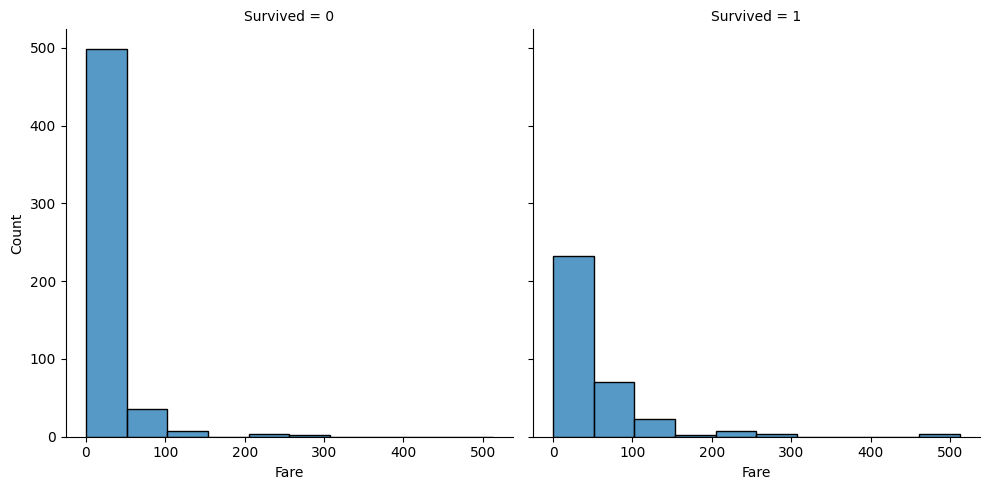

In [21]:
sns.displot(train_dat, x = 'Fare', col = 'Survived', binwidth = 50, height=5)

In [22]:
train_dat['Fare_Cut'] = pd.qcut(train_dat['Fare'], 6)
test_dat['Fare_Cut'] = pd.qcut(test_dat['Fare'], 6)

In [23]:
train_dat.groupby(['Fare_Cut'], as_index=False)['Survived'].mean()

,Fare_Cut,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


In [24]:
train_dat.loc[train_dat['Fare'] <= 7.775, 'Fare'] = 0
train_dat.loc[(train_dat['Fare'] > 7.775) & (train_dat['Fare'] <= 8.662), 'Fare'] = 1
train_dat.loc[(train_dat['Fare'] > 8.662) & (train_dat['Fare'] <= 14.454), 'Fare'] = 2
train_dat.loc[(train_dat['Fare'] > 14.454) & (train_dat['Fare'] <= 26), 'Fare'] = 3
train_dat.loc[(train_dat['Fare'] > 26) & (train_dat['Fare'] <= 52.369), 'Fare'] = 4
train_dat.loc[(train_dat['Fare'] > 52.369) & (train_dat['Fare'] <= 512.329), 'Fare'] = 5
train_dat.loc[train_dat['Fare'] > 512.329, 'Fare'] 

test_dat.loc[test_dat['Fare'] <= 7.775, 'Fare'] = 0
test_dat.loc[(test_dat['Fare'] > 7.775) & (test_dat['Fare'] <= 8.662), 'Fare'] = 1
test_dat.loc[(test_dat['Fare'] > 8.662) & (test_dat['Fare'] <= 14.454), 'Fare'] = 2
test_dat.loc[(test_dat['Fare'] > 14.454) & (test_dat['Fare'] <= 26), 'Fare'] = 3
test_dat.loc[(test_dat['Fare'] > 26) & (test_dat['Fare'] <= 52.369), 'Fare'] = 4
test_dat.loc[(test_dat['Fare'] > 52.369) & (test_dat['Fare'] <= 512.329), 'Fare'] = 5
test_dat.loc[test_dat['Fare'] > 512.329, 'Fare'] 

343    512.3292
Name: Fare, dtype: float64

In [25]:
train_dat['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [26]:
train_dat['Title'] = train_dat['Name'].str.split(pat = ",", expand = True)[1].str.split(pat = ".", expand = True)[0].apply(lambda x:x.strip())
test_dat['Title'] = test_dat['Name'].str.split(pat = ",", expand = True)[1].str.split(pat = ".", expand = True)[0].apply(lambda x:x.strip())

In [27]:
train_dat.groupby(['Title'], as_index=False)['Survived'].agg(['count', 'mean'])

,Title,count,mean
0,Capt,1,0.000000
1,Col,2,0.500000
2,Don,1,0.000000
3,Dr,7,0.428571
4,Jonkheer,1,0.000000
5,Lady,1,1.000000
6,Major,2,0.500000
7,Master,40,0.575000
8,Miss,182,0.697802
9,Mlle,2,1.000000


The survivabiity rate of each person by title

In [28]:
train_dat['Title'] = train_dat['Title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble'    
})

test_dat['Title'] = test_dat['Title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble'    
})

In [30]:
train_dat.groupby(['Title'], as_index=False)['Survived'].agg(['count', 'mean'])

,Title,count,mean
0,Dr,7,0.428571
1,Master,40,0.575000
2,Military,5,0.400000
3,Miss,182,0.697802
4,Mr,517,0.156673
5,Mrs,125,0.792000
6,Noble,9,0.777778
7,Rev,6,0.000000


In [33]:
#NAME length mattered a lot more in the early 1900's
train_dat['Name_Length'] = train_dat['Name'].apply(lambda x: len(x))
test_dat['Name_Length'] = test_dat['Name'].apply(lambda x: len(x))

## Kernel Density Estimate

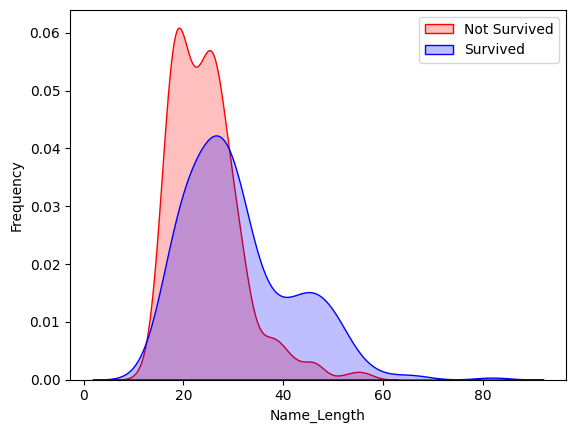

In [36]:
name_plot = sns.kdeplot(train_dat['Name_Length'][(train_dat['Survived']==0) & (train_dat['Name_Length'].notnull())], color='Red', fill=True)
name_plot = sns.kdeplot(train_dat['Name_Length'][(train_dat['Survived']==1) & (train_dat['Name_Length'].notnull())], ax=name_plot, color='Blue', fill=True)
name_plot.set_xlabel('Name_Length')
name_plot.set_ylabel('Frequency')
name_plot = name_plot.legend(['Not Survived', 'Survived'])